In [48]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions

In [49]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 18.5:
        return "underweight"
    elif row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    elif row["bmi"] < 35:
        return "obese"
    else:
        return "severely obese"


data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()


# Drop Bmi

df.drop("bmi", axis=1, inplace=True)


/tmp/ipykernel_72918/2264219793.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("bmi", axis=1, inplace=True)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   sex        1337 non-null   object 
 2   children   1337 non-null   int64  
 3   smoker     1337 non-null   object 
 4   region     1337 non-null   object 
 5   charges    1337 non-null   float64
 6   bmi_class  1337 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 83.6+ KB


In [51]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]
# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])
metrics = []

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test




In [52]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("LR with Kfold CV (Polynomial degree=1)")
print("="*50)
print()
PolynomialFeatures_degree = 1
model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), LinearRegression()    )


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.6f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X_train, y_train)
Model_score_test = model.score(X_test, y_test)
Model_score_training = model.score(X_train, y_train)

R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
metrics.append(["LR with Kfold CV (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.6f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)])

print(metrics[0])

#my_functions.plot_lasso_results('LR with Kfold CV (Polynomial degree=1)', model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)


LR with Kfold CV (Polynomial degree=1)

[0.70321227 0.69244843 0.77207575 0.70744099 0.76533745]
CV Accuracy: 0.728103 (+/- 0.07)
['LR with Kfold CV (Polynomial degree=1)', 0.7714, 3682.057563208955, 5141.480378948708, 0.8166229112465837, 0.7392895272914239, '0.728103 (+/- 0.07)']


In [53]:

print(y_test)

          charges
575   12222.89830
932   10096.97000
956   41999.52000
144   20745.98910
684    4766.02200
...           ...
917   35069.37452
403   10269.46000
899    2117.33885
1337  29141.36030
1235   2699.56835

[268 rows x 1 columns]


In [54]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("LR with Kfold CV (Polynomial degree=2)")
print("="*50)
print()
PolynomialFeatures_degree = 2
model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), LinearRegression()    )


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X_train, y_train)
Model_score_test = model.score(X_test, y_test)
Model_score_training = model.score(X_train, y_train)

R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
metrics.append(["LR with Kfold CV (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)])

print(metrics[1])


#my_functions.plot_lasso_results('LR with Kfold CV (Polynomial degree=2)', model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

LR with Kfold CV (Polynomial degree=2)

[0.79687059 0.79212542 0.89476617 0.8368396  0.85837371]
CV Accuracy: 0.84 (+/- 0.08)
['LR with Kfold CV (Polynomial degree=2)', 0.8771, 2933.693871044776, 3870.1436898445386, 0.8960982439722484, 0.8513529459443046, '0.84 (+/- 0.08)']


In [55]:
################################
################################
#
# Get best Hypermarameters
#
################################
################################


preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

my_functions.get_best_params(
    PolynomialFeatures_degree = 1,  
    model=Lasso(max_iter=100000, 
    tol=0.0001,
    random_state=42, 
    selection='cyclic'),   
    param_grid= {'lasso__alpha': np.linspace(37,41,200)}, 
    preprocessor = preprocessor, 
    X_train = X_train, 
    y_train = y_train)


This function returns the best hyperparameters for the given model, using GridSearchCV.


In [56]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)


print("LASSO with PolynomialFeatures(degree=1)")
print("="*50)
print()
#model = make_pipeline(preprocessor, PolynomialFeatures(degree=1), Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'))
#param_grid = {'lasso__alpha': np.linspace(0.01,100,1000)}
#grid_search = GridSearchCV(model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)
#model = grid_search.best_estimator_


print('Lasso best alpha =  39.4321608040201')
print("time to find best alpha : 1min 10.6s")
#best={'lasso__alpha': 75.6781081081081}
Best_alpha = 39.4321608040201
model_parameters = Lasso(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 1

Lasso_model_PolynomialFeatures_1 = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Lasso_model_PolynomialFeatures_1, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Lasso_model_PolynomialFeatures_1.fit(X_train, y_train)

Model_score_test = Lasso_model_PolynomialFeatures_1.score(X_test, y_test)
Model_score_training = Lasso_model_PolynomialFeatures_1.score(X_train, y_train)
print(f"Lasso Score with PolynomialFeatures(degree=1) : {Model_score_test}")


R2, MAE, RMSE, y_pred = my_functions.get_metrics(Lasso_model_PolynomialFeatures_1, y_test = y_test, X_test = X_test)

metrics.append(["LASSO (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[1])

#my_functions.plot_lasso_results('LASSO (Polynomial degree=1)', Lasso_model_PolynomialFeatures_1, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

LASSO with PolynomialFeatures(degree=1)

Lasso best alpha =  39.4321608040201
time to find best alpha : 1min 10.6s
[0.70660291 0.69252029 0.77249258 0.70644752 0.76305296]
CV Accuracy: 0.73 (+/- 0.07)
Lasso Score with PolynomialFeatures(degree=1) : 0.8183362143567563
['LR with Kfold CV (Polynomial degree=2)', 0.8771, 2933.693871044776, 3870.1436898445386, 0.8960982439722484, 0.8513529459443046, '0.84 (+/- 0.08)']


In [57]:
df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy", 'HyperParamter']).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
#df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy"]).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
df_result

,R2,MAE,RMSE,Score (test),Score (trainging),CV Accuracy,HyperParamter
Model,,,,,,,
LR with Kfold CV (Polynomial degree=2),0.8771,2933.693871,3870.143690,0.896098,0.851353,0.84 (+/- 0.08),None
LASSO (Polynomial degree=1),0.7695,3621.834571,5117.405434,0.818336,0.739337,0.73 (+/- 0.07),Best_alpha : 39.432
LR with Kfold CV (Polynomial degree=1),0.7714,3682.057563,5141.480379,0.816623,0.739290,0.728103 (+/- 0.07),None


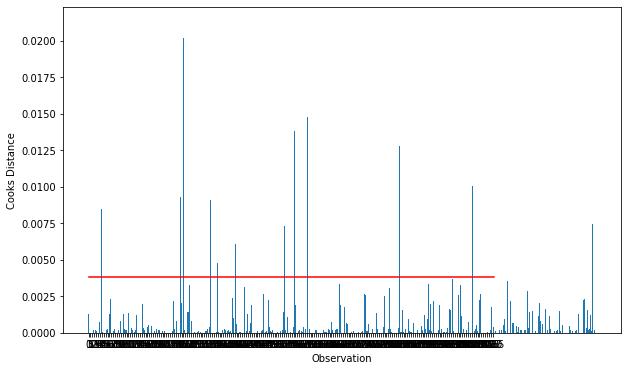

In [58]:

def get_index_to_remove_by_Cooks_Distance(X_train, y_train, preprocessor):
    X_test_pipe = preprocessor.transform(X_train)


    # Get the names of the columns added by the OneHotEncoder
    new_columns = preprocessor.get_feature_names_out()
    new_columns = [w.replace('pipeline-1__', '') for w in new_columns]
    new_columns = [w.replace('pipeline-2__', '') for w in new_columns]


    newdf = pd.DataFrame(X_test_pipe)

    newdf.columns = new_columns



    import statsmodels.api as sm


    X = sm.add_constant(newdf)
    X = X.set_index(y_train.index)
    estimation = sm.OLS(y_train, X_test_pipe).fit()
    #estimation.summary()
    influence = estimation.get_influence().cooks_distance[0]

    X['dcooks'] = influence
    n = X.shape[0]
    p = X.shape[1]
    seuil_dcook = 4/(n-p)

    index_to_be_removed = X[X['dcooks']>seuil_dcook].index

    plt.figure(figsize=(10,6))
    plt.bar(X.index, X['dcooks'])
    plt.xticks(np.arange(0, len(X), step=5))
    plt.xlabel('Observation')
    plt.ylabel('Cooks Distance')
    plt.plot([0, len(X)], [seuil_dcook, seuil_dcook], color='r')
    plt.show()
    
    return index_to_be_removed

index_to_be_removed = get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=preprocessor)
X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)



In [59]:
PolynomialFeatures_degree = 1
model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), LinearRegression()    )


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.6f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



[0.82536293 0.83271761 0.79203106 0.84093225 0.80445239]
CV Accuracy: 0.819099 (+/- 0.04)


In [60]:
0.72810

0.7281

In [63]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8144473182208555
0.8242734569648739


In [ ]:
y_test

,charges
575,12222.89830
932,10096.97000
956,41999.52000
144,20745.98910
684,4766.02200
...,...
917,35069.37452
403,10269.46000
899,2117.33885
1337,29141.36030
